In [52]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [55]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
basemap = automap_base() 
# reflect the tables
basemap.prepare(engine, reflect=True)

In [57]:
# View all of the classes that automap found
basemap.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
measurement = basemap.classes.measurement
station = basemap.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [60]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
engine.execute("select * from measurement limit 10").fetchall()
session.query(func.count(measurement.date)).all()

[(19550,)]

In [62]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [63]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago).\
    order_by(measurement.date).all()
precipitation

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [64]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(val_cal, columns=['date','precipitation'])

# Sort the dataframe by date

df.sort_values(by='date',ascending= True) 
df.rename(columns={0:"Date",1:"Precipitation"},inplace =True)
df.set_index('date')
df.head

<bound method NDFrame.head of            date  precipitation
0    2016-08-23           0.00
1    2016-08-24           0.08
2    2016-08-25           0.08
3    2016-08-26           0.00
4    2016-08-27           0.00
..          ...            ...
361  2017-08-19           0.00
362  2017-08-20           0.00
363  2017-08-21           0.00
364  2017-08-22           0.00
365  2017-08-23           0.00

[366 rows x 2 columns]>

Text(0, 0.5, 'Inches')

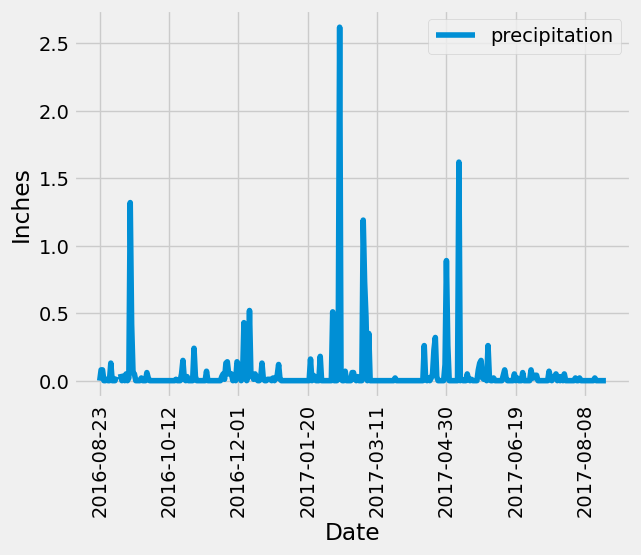

In [65]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")



In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [67]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(measurement.station).distinct().count()
stations

9

In [68]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]

min_max_avg_temp = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()
min_max_avg_temp

[(54.0, 85.0, 71.66378066378067)]

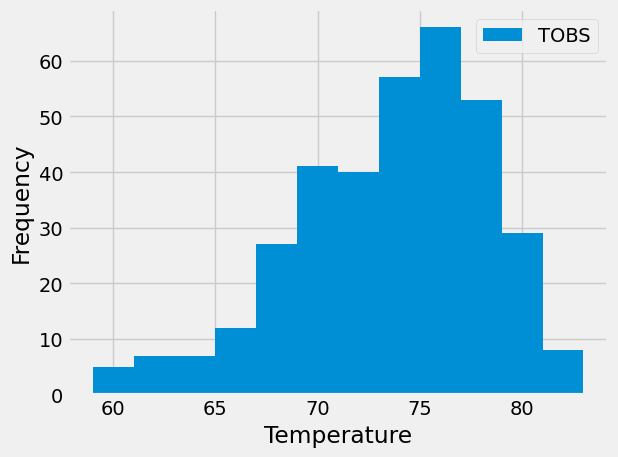

In [70]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table

tobs_data = session.query(measurement.tobs).\
    filter(measurement.date >= one_year_ago).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

tobs_data_df = pd.DataFrame(tobs_data, columns=["TOBS"])

tobs_data_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Close session

In [71]:
# Close Session
session.close()